In [1]:
from qiskit import *
from qiskit.visualization import circuit_drawer,plot_histogram
from pathlib import Path
import os
import time
# Load QASM from a file
qasm_folder = Path("./qasm_files/")
qasm_filename = list(qasm_folder.glob("*.qasm")) #using glob to get a list of files.
print(qasm_filename)

[PosixPath('qasm_files/dj_indep_qiskit_10.qasm'), PosixPath('qasm_files/ghz_indep_qiskit_10.qasm')]


In [2]:
def extract_filename(file_path):
    filename = os.path.basename(file_path) 
    if ".qasm" in filename:
        return filename.split(".qasm")[0] 

In [4]:
prob_qsim={}
prob_qasm={}
dm_sim = BasicAer.get_backend('dm_simulator')
qasm_sim =  BasicAer.get_backend("qasm_simulator")
j=1
for i in qasm_filename: 
    k=len(qasm_filename)
    with open(i, "r") as file:
        qasm_str = file.read()  # Read QASM as string
        circuit = QuantumCircuit.from_qasm_str(qasm_str)
        ckt_name=extract_filename(i)
        print("******************************** AlgoNumber-",j,"out of ",k, "-",ckt_name,"********************************")
        print(circuit)

        
        start= time.time()
        run = execute(circuit,dm_sim)
        end= time.time()
        result = run.result()
        print("Execution time of ",dm_sim,":: ", end-start,"seconds")
        #print('Density Matrix: \n',result['results'][0]['data']['densitymatrix'])
        prob_qsim[ckt_name]=result.results[0].data.partial_probability

        start1= time.time()
        run1 = execute(circuit,qasm_sim)
        end1= time.time()
        result1 = run1.result()
        print("Execution time of ",qasm_sim,":: ", end1-start1,"seconds")
        #print("result:",result)
        #prob_qasm[ckt_name]=result2.results[0].data.partial_probability
        prob_qasm[ckt_name]=result1.results[0].data.counts
        
        j=j+1
#print(prob_qsim)
#print(prob_qasm)

******************************** AlgoNumber- 1 out of  2 - dj_indep_qiskit_10 ********************************
      ┌─────────┐      ┌───────────┐                                    »
q_0: ─┤ U2(0,0) ├───■──┤ U2(-π,-π) ├────────────────────────────────────»
      ├─────────┤   │  └───────────┘┌───────────┐                       »
q_1: ─┤ U2(0,0) ├───┼────────■──────┤ U2(-π,-π) ├───────────────────────»
      └──┬───┬──┘   │        │      └───────────┘┌───┐                  »
q_2: ────┤ H ├──────┼────────┼────────────■──────┤ H ├──────────────────»
      ┌──┴───┴──┐   │        │            │      └───┘┌───────────┐     »
q_3: ─┤ U2(0,0) ├───┼────────┼────────────┼────────■──┤ U2(-π,-π) ├─────»
      └──┬───┬──┘   │        │            │        │  └───────────┘┌───┐»
q_4: ────┤ H ├──────┼────────┼────────────┼────────┼────────■──────┤ H ├»
      ┌──┴───┴──┐   │        │            │        │        │      └───┘»
q_5: ─┤ U2(0,0) ├───┼────────┼────────────┼────────┼────────┼────────■──»
 

In [5]:
%matplotlib inline
from qiskit.visualization import circuit_drawer,plot_histogram
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use("TkAgg")
qsim_non_zero ={}
for ckt, probs in prob_qsim.items():
    print(ckt) 
    filtered_probs = {key: value for key, value in probs.items() if value > 0} #Filtere-out zero-values
    keys = list(filtered_probs.keys())
    values = list(filtered_probs.values())
    qsim_non_zero = dict(zip(keys, values))
    print(qsim_non_zero)
    plot_histogram(qsim_non_zero).show() 

dj_indep_qiskit_10
{'111111111': 1.0}
ghz_indep_qiskit_10
{'0000000000': 0.5, '1111111111': 0.5}


dj_indep_qiskit_10


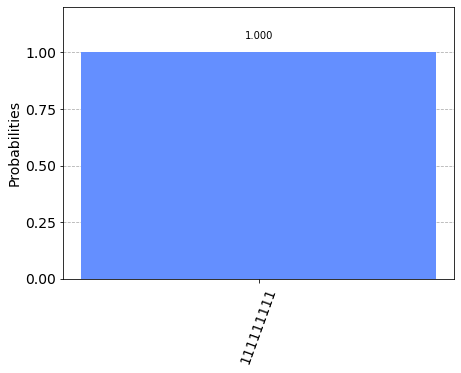

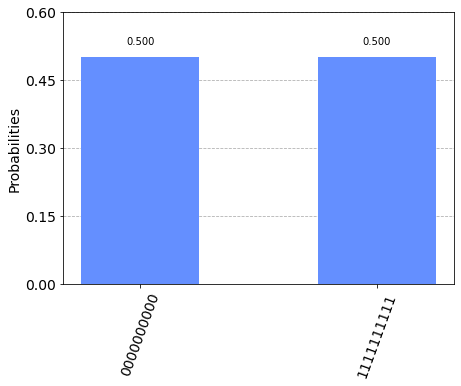

ghz_indep_qiskit_10


In [6]:
%matplotlib inline
#matplotlib.use('MacOSX')
for ckt, probs in prob_qasm.items():
    print(ckt) 
    plot_histogram(probs)
    plt.show()  

In [8]:
from qiskit.quantum_info import hellinger_distance
import numpy as np
# Computing Hellinger distance

qasm_non_zero={}
for i, j in prob_qasm.items():
    for a, b in j.items():
        c=bin(b)[2:]
    qasm_non_zero = dict(zip(keys, values))


distance = hellinger_distance(qsim_non_zero, qasm_non_zero)
print(f"Hellinger Distance: {distance}")

Hellinger Distance: 0.0
